<a href="https://colab.research.google.com/github/RainNP/Capstone_Project/blob/main/Capstone_project_bike_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Capstone Project

This project is part of Google Data Analytics Certificates 


**Project scenario**

The marketing analyst team at Cyclistic, a bike-share company in Chicago

The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. 

Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently.





**In this project**

I will use the data to find how casual riders and annual members use Cyclistic bikes differently.

The data come from [this link](https://divvy-tripdata.s3.amazonaws.com/index.html) (The datasets have a different name because Cyclistic is a fictional company.)

The dataset provides data from 2014-Oct2022 but we will use only data from Nov2021-Oct2022 total of 12 months 

First we have to choose whitch program we would use 

The Google Data Analytics Certificates teach how to use spreadsheet, BigQuery(SQL) and R

The data set file is too big for spreadsheet and BigQuery and RStudio free plan only give you 1GB RAM that's not enough for the dataset

Other option is Python in Google colab, so here we are. 

Then the library we gonna use is **pandas**, **numpy**, **matplotlib** and **seaborn** so we import them 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then download all the data from Nov2021-Oct2022 and import it to your Google drive and usethe code below

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
all_file = [pd.read_csv("/content/gdrive/MyDrive/data/202111-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202112-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202201-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202202-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202203-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202204-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202205-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202206-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202207-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202208-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202209-divvy-tripdata.csv"),
pd.read_csv("/content/gdrive/MyDrive/data/202210-divvy-tripdata.csv")]

Combine all files into one dataframe and use .head() to check attributes of the dataframe 

then use .drop_duplicates() to delete duplicates

In [47]:
all_data = pd.concat([i for i in all_file],ignore_index = True)
all_data = all_data.drop_duplicates()
all_data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.930000,-87.720000,41.960000,-87.730000,casual
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.960000,-87.700000,41.920000,-87.700000,casual
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.960000,-87.700000,41.960000,-87.700000,casual
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.940000,-87.790000,41.930000,-87.790000,casual
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.900000,-87.630000,41.880000,-87.620000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5755689,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,Clifton Ave & Armitage Ave,TA1307000163,Lincoln Ave & Roscoe St*,chargingstx5,41.918216,-87.656936,41.943350,-87.670668,casual
5755690,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,Clifton Ave & Armitage Ave,TA1307000163,Lincoln Ave & Roscoe St*,chargingstx5,41.918216,-87.656936,41.943350,-87.670668,casual
5755691,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,Sedgwick St & North Ave,TA1307000038,Wabash Ave & Grand Ave,TA1307000117,41.911386,-87.638677,41.891466,-87.626761,casual
5755692,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,Sedgwick St & North Ave,TA1307000038,Damen Ave & Clybourn Ave,13271,41.911386,-87.638677,41.931931,-87.677856,member


start_station and end_staion seem to have many **null** but the lat and lng doesn't have any problem so I think I don't have to delete it out 

Next let's check the type of all attributes

In [ ]:
print(all_data.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object




---


start_at and end_at types is object but we want it to be datetime

then we add some coloumn for analysis

In [6]:
all_data["started_at"] = pd.to_datetime(all_data["started_at"],format = "%Y-%m-%d %H:%M:%S")
all_data["ended_at"] = pd.to_datetime(all_data["ended_at"],format = "%Y-%m-%d %H:%M:%S")
all_data["ride_length"] = (all_data["ended_at"] - all_data["started_at"]).astype('timedelta64[m]')
all_data["day_of_week"] = all_data["started_at"].dt.day_name()
all_data["month"] = all_data["started_at"].dt.to_period('M')
all_data["start_hour"] = all_data["started_at"].dt.hour
all_data.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
ride_length                  float64
day_of_week                   object
month                      period[M]
start_hour                     int64
dtype: object



---


Okay, let's start with basic information 

plot the pie chart to see the different between the member and casual rides 

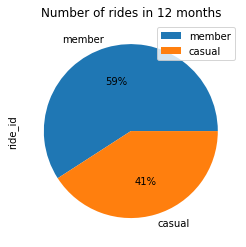

In [17]:
all_data.groupby("member_casual").count().reindex(["member","casual"]).plot(kind='pie', y='ride_id',autopct='%1.0f%%',title='Number of rides in 12 months')

The number of member rides are more than the casual rides in this 12 month



---


Next let's check the number of rides in each month

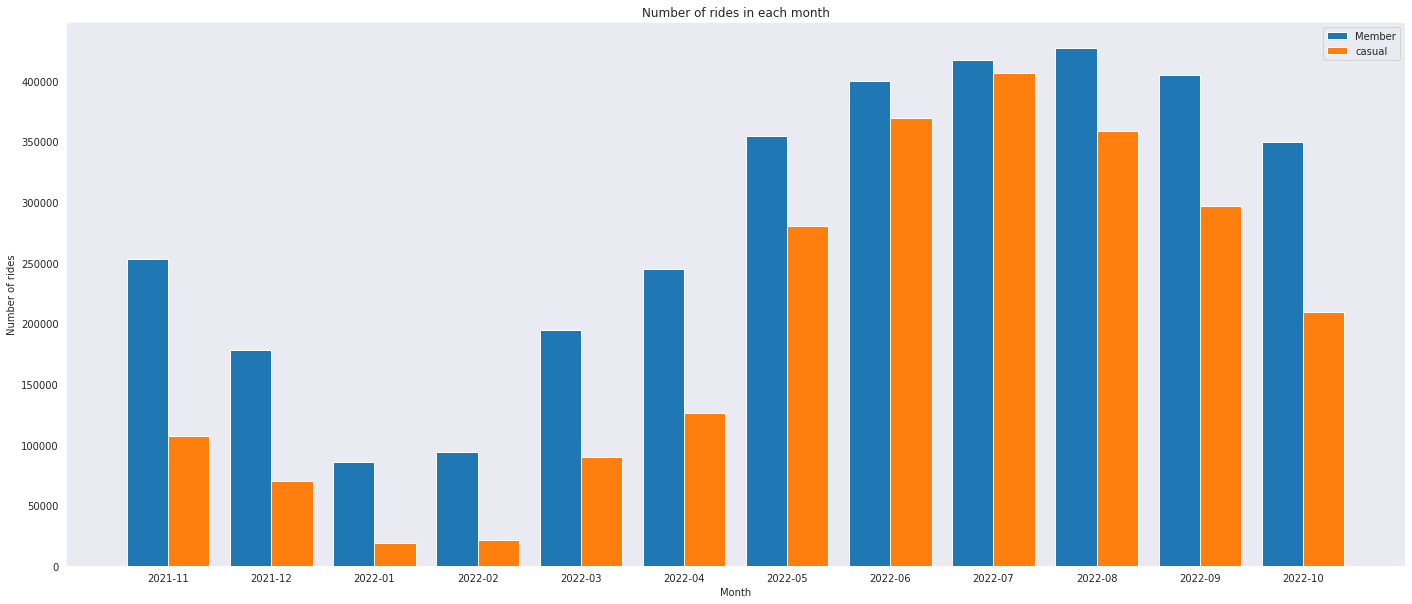

In [35]:
fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data.month.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each month")
ax.set_xlabel("Month")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(all_data.month.unique())

b1 = ax.bar(x, all_data.loc[all_data['member_casual'] == 'member',["ride_id","month"]].groupby("month").count()["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, all_data.loc[all_data['member_casual'] == 'casual',["ride_id","month"]].groupby("month").count()["ride_id"],width=bar_width,label='casual')
ax.legend()

THe number of rides in January and February is kinda low. **Why?**

Maybe the temperature? let's google **the average temperature by each month in chicago** 

Google show us the graph of temperature in chicago each months
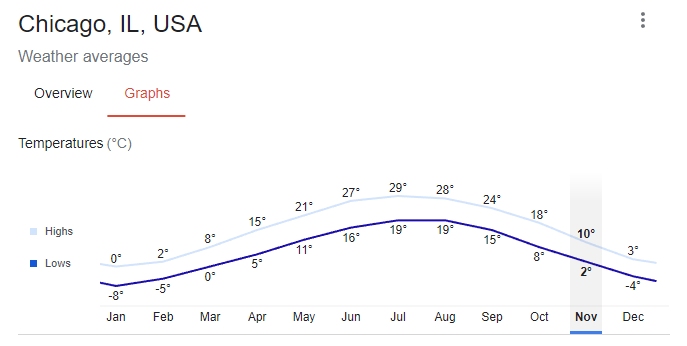

So the temperature accually effect on the number of rides

if the temperature is low the number of rides will be low too



---


Next the number of rides by day of week 

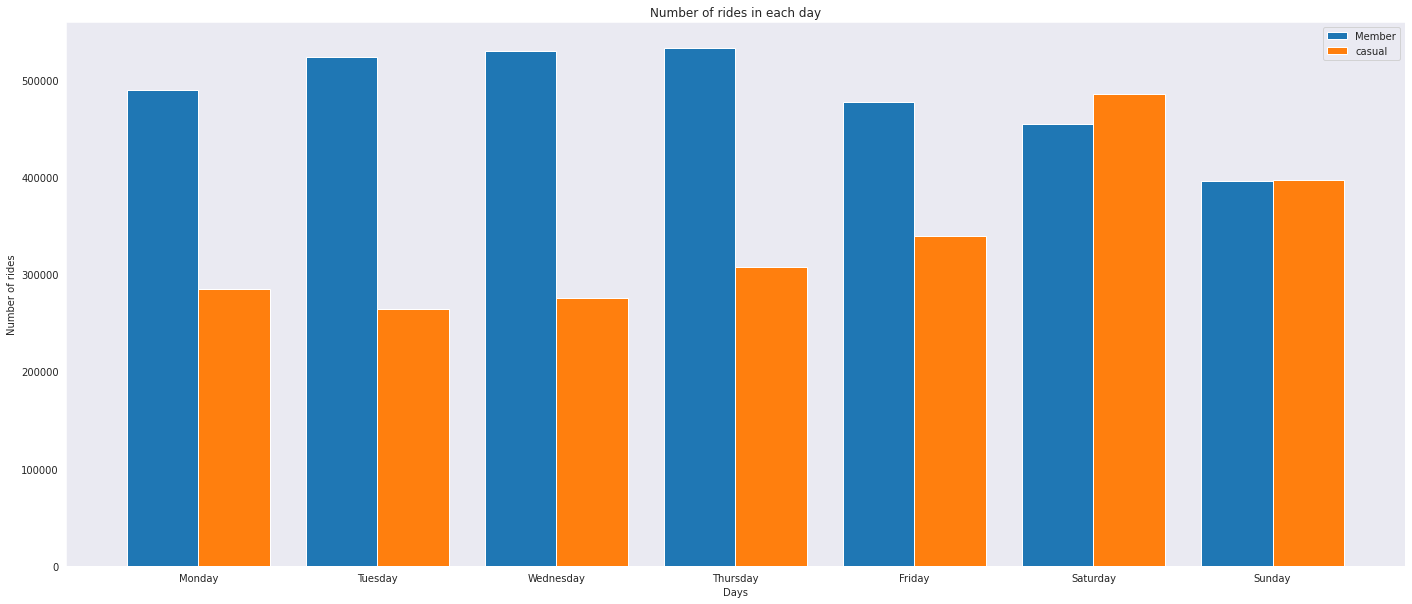

In [36]:
fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data.day_of_week.unique()))
bar_width = 0.4
day_index = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each day")
ax.set_xlabel("Days")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(day_index)

b1 = ax.bar(x, all_data.loc[all_data['member_casual'] == 'member',["ride_id","day_of_week"]].groupby("day_of_week").count()["ride_id"].reindex(day_index),width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, all_data.loc[all_data['member_casual'] == 'casual',["ride_id","day_of_week"]].groupby("day_of_week").count()["ride_id"].reindex(day_index),width=bar_width,label='casual')
ax.legend()

we find many interesting information here 

*   The number of rides of member on weekday is more than the number of member rides on weekend
*   The casual rides on weekday is low while the casual rides on weekend is really high
*   The casual rides on weekday is less than the member rides
*   While the casual rides on weekend is more than the member rides

maybe member rider use the bike to work?





---


let's check more information about the number of rides each hour 

In [10]:
all_data_each_hour = all_data.loc[:,["ride_id","rideable_type","member_casual","month","day_of_week","ride_length","start_hour"]]

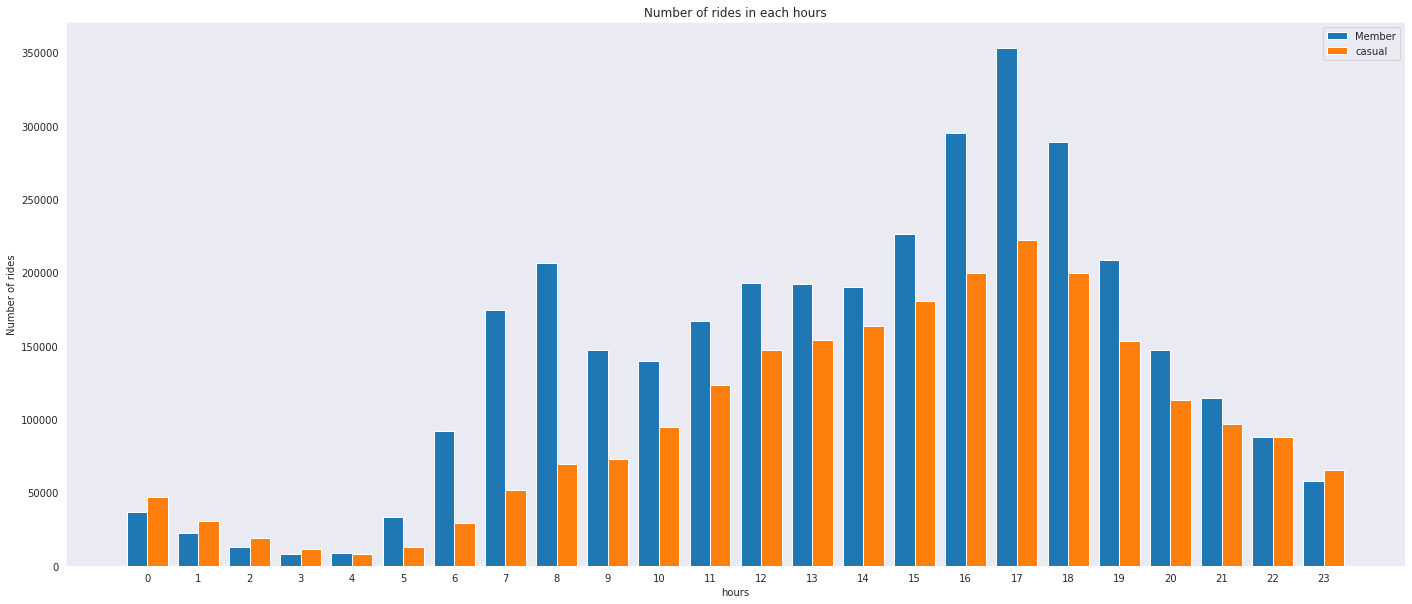

In [37]:
member_rides_by_hour = all_data_each_hour.loc[all_data_each_hour["member_casual"] == "member",["ride_id","start_hour"]].groupby("start_hour").count()
casual_rides_by_hour = all_data_each_hour.loc[all_data_each_hour["member_casual"] == "casual",["ride_id","start_hour"]].groupby("start_hour").count()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data_each_hour.start_hour.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each hours")
ax.set_xlabel("hours")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(np.sort(all_data_each_hour.start_hour.unique()))

b1 = ax.bar(x, member_rides_by_hour["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_rides_by_hour["ride_id"],width=bar_width,label='casual')
ax.legend()



*   We could see that member rides peak at 7.00-8.00  and 16.00-18.00c it might be that member usually use bike to work
*   casual rides peak at only 16.00-18.00 might be people that does not use bike to work



We might get more information from each day of week

In [11]:
all_data_each_day = all_data_each_hour.loc[:,["ride_id","start_hour","day_of_week","member_casual"]]
all_data_each_day

,ride_id,start_hour,day_of_week,member_casual
0,7C00A93E10556E47,13,Saturday,casual
1,90854840DFD508BA,13,Saturday,casual
2,0A7D10CDD144061C,22,Friday,casual
3,2F3BE33085BCFF02,9,Saturday,casual
4,D67B4781A19928D4,19,Friday,casual
...,...,...,...,...
5755689,BC3BFA659C9AB6F1,1,Sunday,casual
5755690,ACD65450291CF95F,1,Sunday,casual
5755691,4AAC03D1438E97CA,9,Saturday,casual
5755692,8E6F3F29785E5D40,10,Sunday,member




---


**Monday**

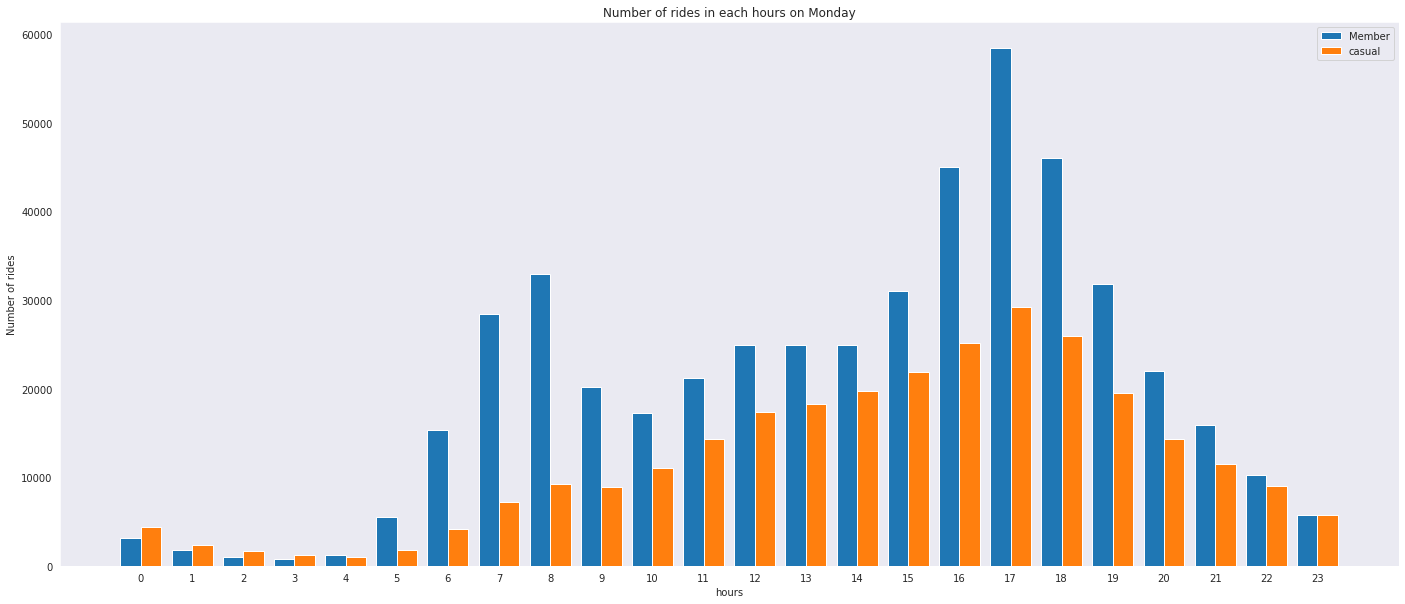

In [38]:
all_data_monday = all_data_each_day.loc[all_data_each_day["day_of_week"] == "Monday",["ride_id","start_hour","member_casual"]]
member_rides_by_hour_monday = all_data_monday.loc[all_data_monday["member_casual"] == "member",["ride_id","start_hour"]].groupby("start_hour").count()
casual_rides_by_hour_monday = all_data_monday.loc[all_data_monday["member_casual"] == "casual",["ride_id","start_hour"]].groupby("start_hour").count()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data_each_hour.start_hour.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each hours on Monday")
ax.set_xlabel("hours")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(np.sort(all_data_each_hour.start_hour.unique()))

b1 = ax.bar(x, member_rides_by_hour_monday["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_rides_by_hour_monday["ride_id"],width=bar_width,label='casual')
ax.legend()



---


**Tuesday**

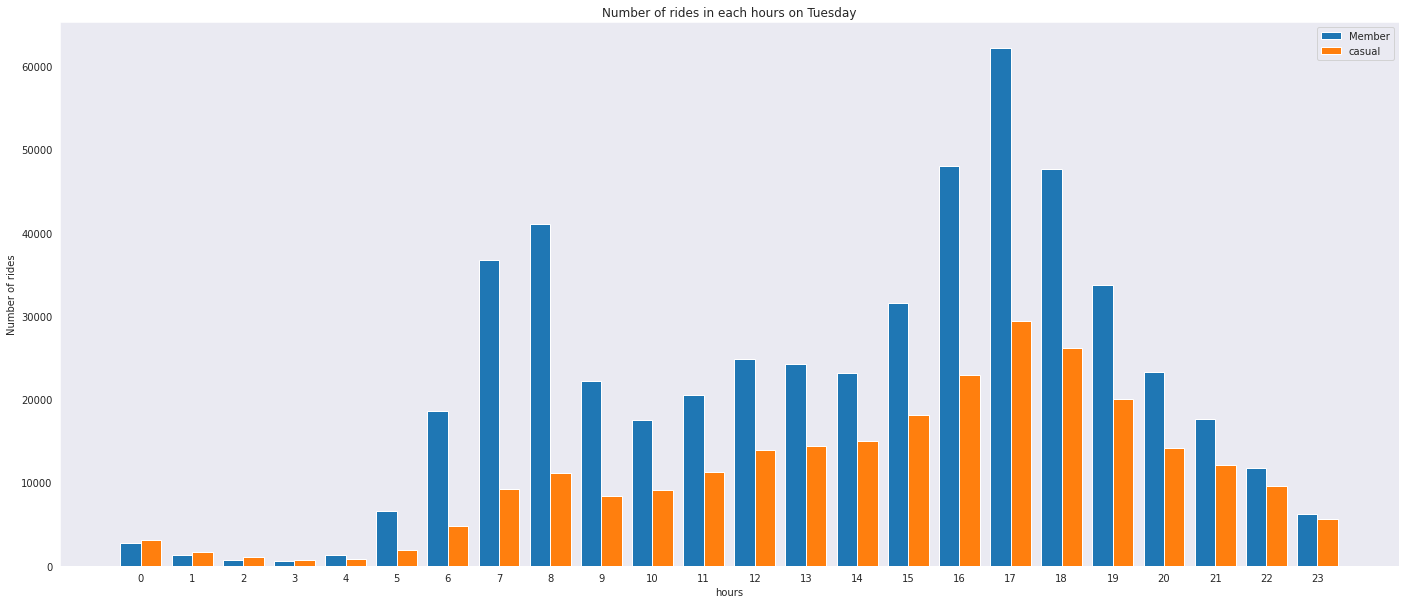

In [39]:
all_data_tuesday = all_data_each_day.loc[all_data_each_day["day_of_week"] == "Tuesday",["ride_id","start_hour","member_casual"]]
member_rides_by_hour_tuesday = all_data_tuesday.loc[all_data_tuesday["member_casual"] == "member",["ride_id","start_hour"]].groupby("start_hour").count()
casual_rides_by_hour_tuesday = all_data_tuesday.loc[all_data_tuesday["member_casual"] == "casual",["ride_id","start_hour"]].groupby("start_hour").count()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data_each_hour.start_hour.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each hours on Tuesday")
ax.set_xlabel("hours")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(np.sort(all_data_each_hour.start_hour.unique()))

b1 = ax.bar(x, member_rides_by_hour_tuesday["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_rides_by_hour_tuesday["ride_id"],width=bar_width,label='casual')
ax.legend()



---


**Wednesday**

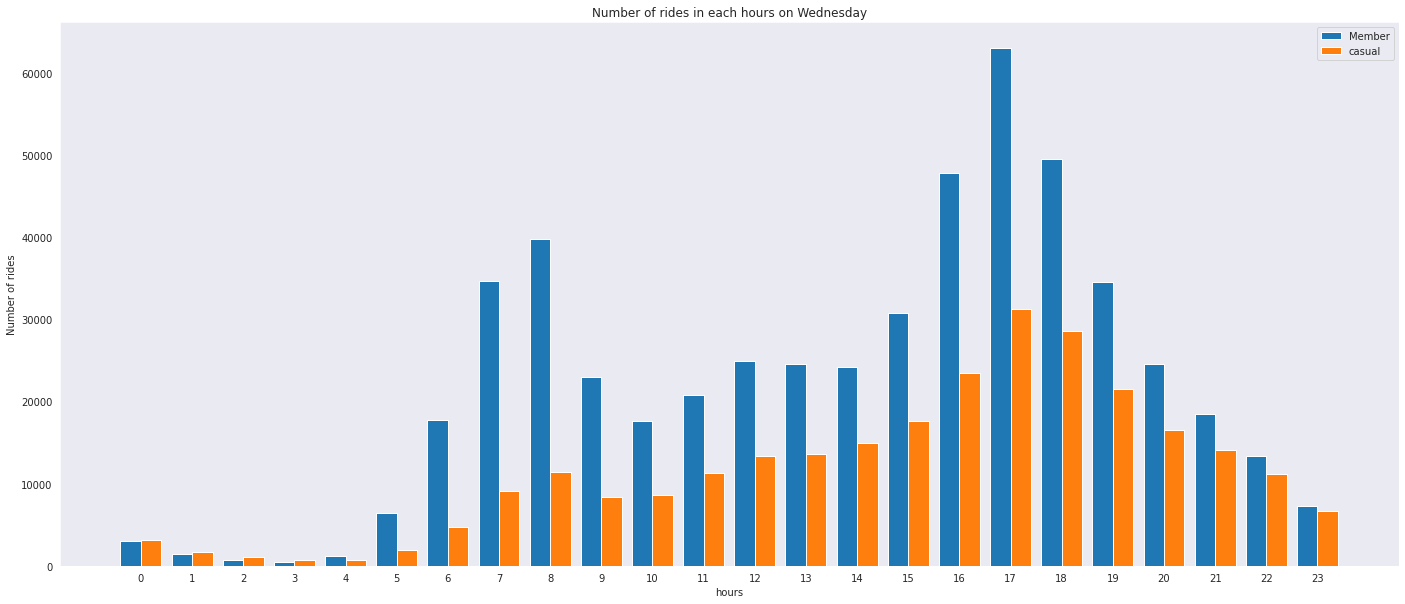

In [40]:
all_data_wednesday = all_data_each_day.loc[all_data_each_day["day_of_week"] == "Wednesday",["ride_id","start_hour","member_casual"]]
member_rides_by_hour_wednesday = all_data_wednesday.loc[all_data_wednesday["member_casual"] == "member",["ride_id","start_hour"]].groupby("start_hour").count()
casual_rides_by_hour_wednesday = all_data_wednesday.loc[all_data_wednesday["member_casual"] == "casual",["ride_id","start_hour"]].groupby("start_hour").count()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data_each_hour.start_hour.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each hours on Wednesday")
ax.set_xlabel("hours")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(np.sort(all_data_each_hour.start_hour.unique()))

b1 = ax.bar(x, member_rides_by_hour_wednesday["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_rides_by_hour_wednesday["ride_id"],width=bar_width,label='casual')
ax.legend()



---


**Thursday**

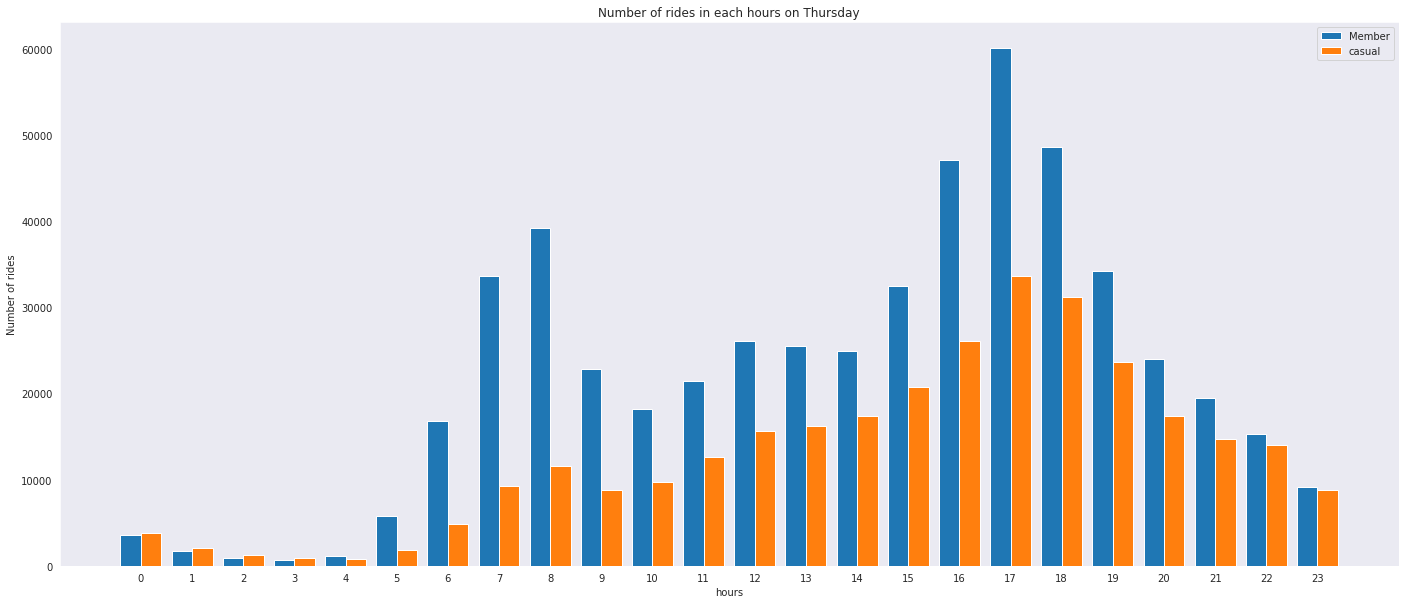

In [41]:
all_data_thursday = all_data_each_day.loc[all_data_each_day["day_of_week"] == "Thursday",["ride_id","start_hour","member_casual"]]
member_rides_by_hour_thursday = all_data_thursday.loc[all_data_thursday["member_casual"] == "member",["ride_id","start_hour"]].groupby("start_hour").count()
casual_rides_by_hour_thursday = all_data_thursday.loc[all_data_thursday["member_casual"] == "casual",["ride_id","start_hour"]].groupby("start_hour").count()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data_each_hour.start_hour.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each hours on Thursday")
ax.set_xlabel("hours")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(np.sort(all_data_each_hour.start_hour.unique()))

b1 = ax.bar(x, member_rides_by_hour_thursday["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_rides_by_hour_thursday["ride_id"],width=bar_width,label='casual')
ax.legend()



---


**Friday**

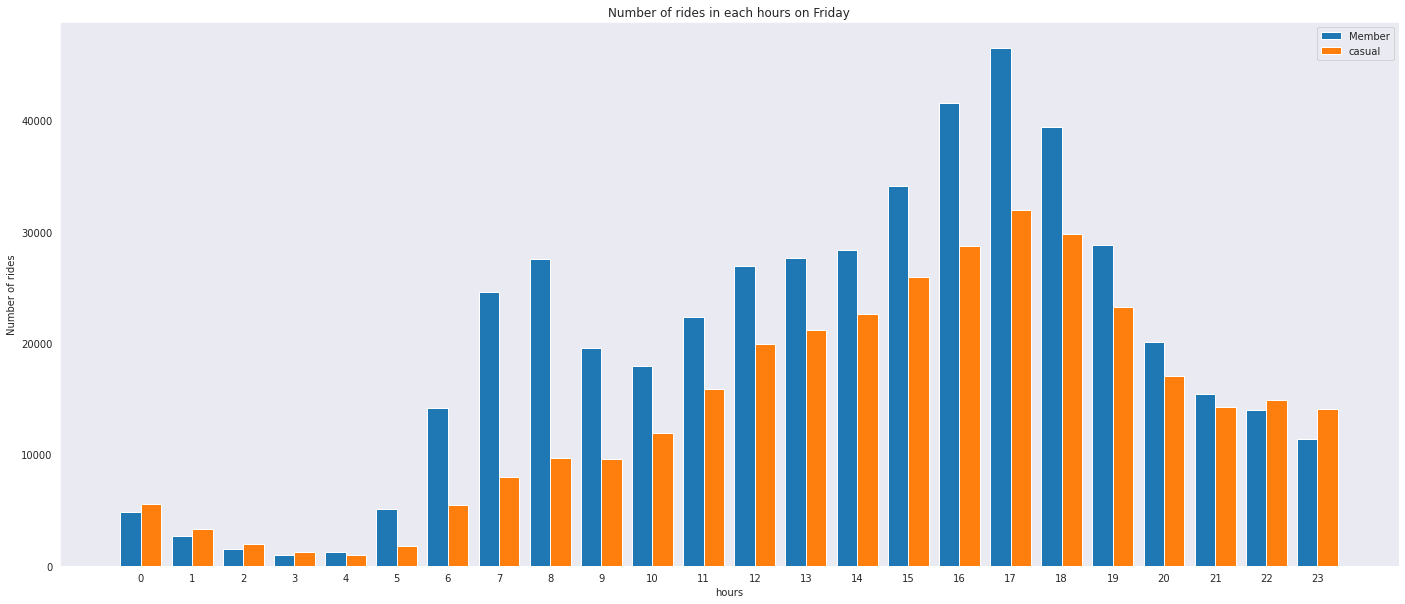

In [42]:
all_data_friday = all_data_each_day.loc[all_data_each_day["day_of_week"] == "Friday",["ride_id","start_hour","member_casual"]]
member_rides_by_hour_friday = all_data_friday.loc[all_data_friday["member_casual"] == "member",["ride_id","start_hour"]].groupby("start_hour").count()
casual_rides_by_hour_friday = all_data_friday.loc[all_data_friday["member_casual"] == "casual",["ride_id","start_hour"]].groupby("start_hour").count()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data_each_hour.start_hour.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each hours on Friday")
ax.set_xlabel("hours")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(np.sort(all_data_each_hour.start_hour.unique()))

b1 = ax.bar(x, member_rides_by_hour_friday["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_rides_by_hour_friday["ride_id"],width=bar_width,label='casual')
ax.legend()



---


**Saturday**

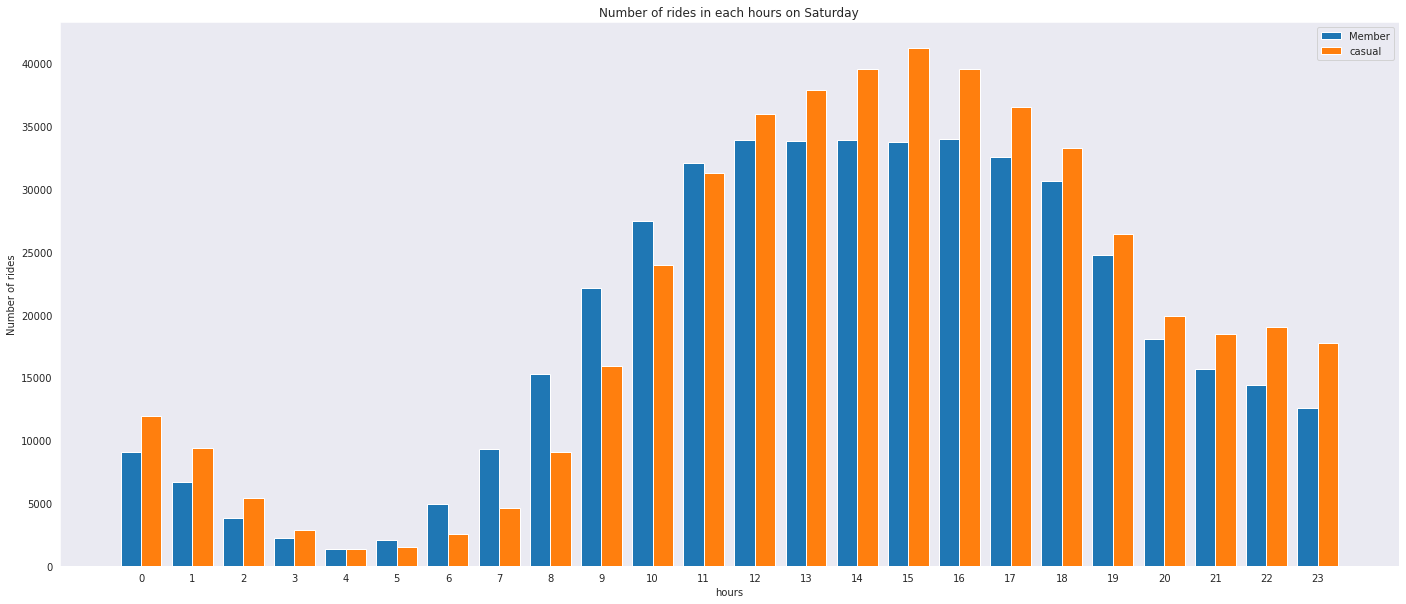

In [43]:
all_data_saturday = all_data_each_day.loc[all_data_each_day["day_of_week"] == "Saturday",["ride_id","start_hour","member_casual"]]
member_rides_by_hour_saturday = all_data_saturday.loc[all_data_saturday["member_casual"] == "member",["ride_id","start_hour"]].groupby("start_hour").count()
casual_rides_by_hour_saturday = all_data_saturday.loc[all_data_saturday["member_casual"] == "casual",["ride_id","start_hour"]].groupby("start_hour").count()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data_each_hour.start_hour.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each hours on Saturday")
ax.set_xlabel("hours")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(np.sort(all_data_each_hour.start_hour.unique()))

b1 = ax.bar(x, member_rides_by_hour_saturday["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_rides_by_hour_saturday["ride_id"],width=bar_width,label='casual')
ax.legend()



---


**Sunday**

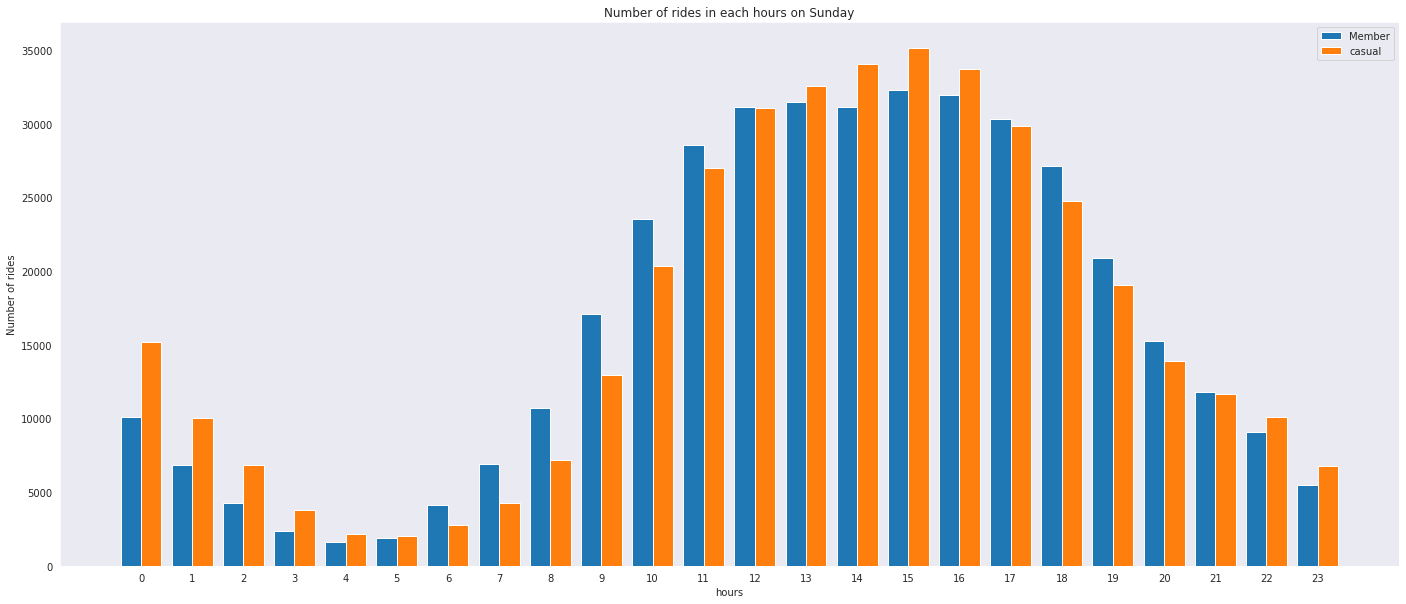

In [44]:
all_data_sunday = all_data_each_day.loc[all_data_each_day["day_of_week"] == "Sunday",["ride_id","start_hour","member_casual"]]
member_rides_by_hour_sunday = all_data_sunday.loc[all_data_sunday["member_casual"] == "member",["ride_id","start_hour"]].groupby("start_hour").count()
casual_rides_by_hour_sunday = all_data_sunday.loc[all_data_sunday["member_casual"] == "casual",["ride_id","start_hour"]].groupby("start_hour").count()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data_each_hour.start_hour.unique()))
bar_width = 0.4

ax.set_ylabel("Number of rides")
ax.set_title("Number of rides in each hours on Sunday")
ax.set_xlabel("hours")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(np.sort(all_data_each_hour.start_hour.unique()))

b1 = ax.bar(x, member_rides_by_hour_sunday["ride_id"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_rides_by_hour_sunday["ride_id"],width=bar_width,label='casual')
ax.legend()

We can clearly see that

*   The graph on Monday-Friday and Saturday-Sunday is clearly different 






---


What about bike preference of member rider?

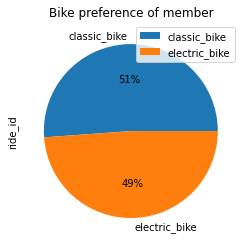

In [18]:
member_bike = all_data.loc[all_data['member_casual'] == 'member',["ride_id","rideable_type"]]

member_bike.groupby("rideable_type").count().sort_values("rideable_type").plot(kind='pie', y='ride_id',autopct='%1.0f%%',title='Bike preference of member')



*   The member does not use the docked bike.
*   classic bike and electric bike is most likely the same.





---



Well, what about casual rider?

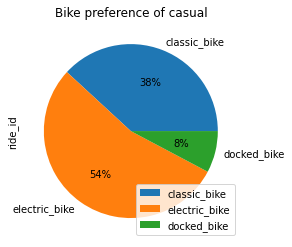

In [21]:
casual_bike = all_data.loc[all_data['member_casual'] == 'casual',["ride_id","rideable_type"]]

casual_bike.groupby("rideable_type").count().reindex(["classic_bike","electric_bike","docked_bike"]).plot(kind='pie', y='ride_id',autopct='%1.0f%%',title='Bike preference of casual')
plt.legend(loc="lower right")



*   Most likely used electric bike
*   Some are using docked bike





---


Next we'll look into the ride_length 

First let's use .describe()

In [ ]:
all_data.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,start_hour
count,5.755694e+06,5.755694e+06,5.749859e+06,5.749859e+06,5.755694e+06,5.755694e+06
mean,4.190167e+01,-8.764782e+01,4.190192e+01,-8.764802e+01,1.895058e+01,1.422014e+01
std,4.677934e-02,3.050527e-02,4.688818e-02,3.009472e-02,1.747905e+02,5.021527e+00
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01,-1.035400e+04,0.000000e+00
25%,4.188103e+01,-8.766201e+01,4.188103e+01,-8.766356e+01,5.000000e+00,1.100000e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01,1.000000e+01,1.500000e+01
75%,4.193000e+01,-8.762952e+01,4.193000e+01,-8.762954e+01,1.800000e+01,1.800000e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,-8.730000e+01,4.138700e+04,2.300000e+01


min ride_length seem to have problem 
length can't be minus


In [24]:
all_ride_length = all_data.loc[:,["ride_id","rideable_type","member_casual","month","day_of_week","ride_length"]]
#member_ride_length_by_month
all_ride_length.quantile([0,.05,.10,.15,.85,.90,.95,1])

,ride_length
0.00,-10354.0
0.05,2.0
0.10,3.0
0.15,4.0
0.85,25.0
0.90,32.0
0.95,45.0
1.00,41387.0


We'll remove outliner, so we'll use only data from percentile 5-95%

In [25]:
data_95 = all_ride_length[all_ride_length.ride_length > np.percentile(all_ride_length.ride_length,95)].index
data_5 = all_ride_length[all_ride_length.ride_length < np.percentile(all_ride_length.ride_length,5)].index
all_length_no_outliner = all_ride_length.drop(data_95)
all_length_no_outliner = all_length_no_outliner.drop(data_5)
all_length_no_outliner.describe()

,ride_length
count,5.253983e+06
mean,1.252299e+01
std,9.250347e+00
min,2.000000e+00
25%,6.000000e+00
50%,1.000000e+01
75%,1.700000e+01
max,4.500000e+01




---


After we delete outliner. let's see some basic information 

Different between sum of member and casual ride_length

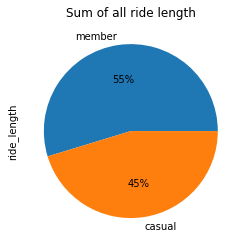

In [26]:
all_length_no_outliner.groupby("member_casual")["ride_length"].sum().reindex(["member","casual"]).plot(kind='pie', y='ride_length',autopct='%1.0f%%',title='Sum of all ride length')



---


Differnt Between average of member and casual ride_length

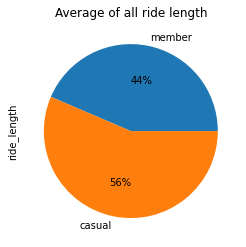

In [27]:
all_length_no_outliner.groupby("member_casual")["ride_length"].mean().reindex(["member","casual"]).plot(kind='pie', y='ride_length',autopct='%1.0f%%',title='Average of all ride length')

We can see that

*   Total ride_length of member is more than casual rides because number of member rides are more than casual rides
*   But average ride_length of casual rides is more than member rides





---


Let's see more details 

Average ride_length of member and casual rides by month

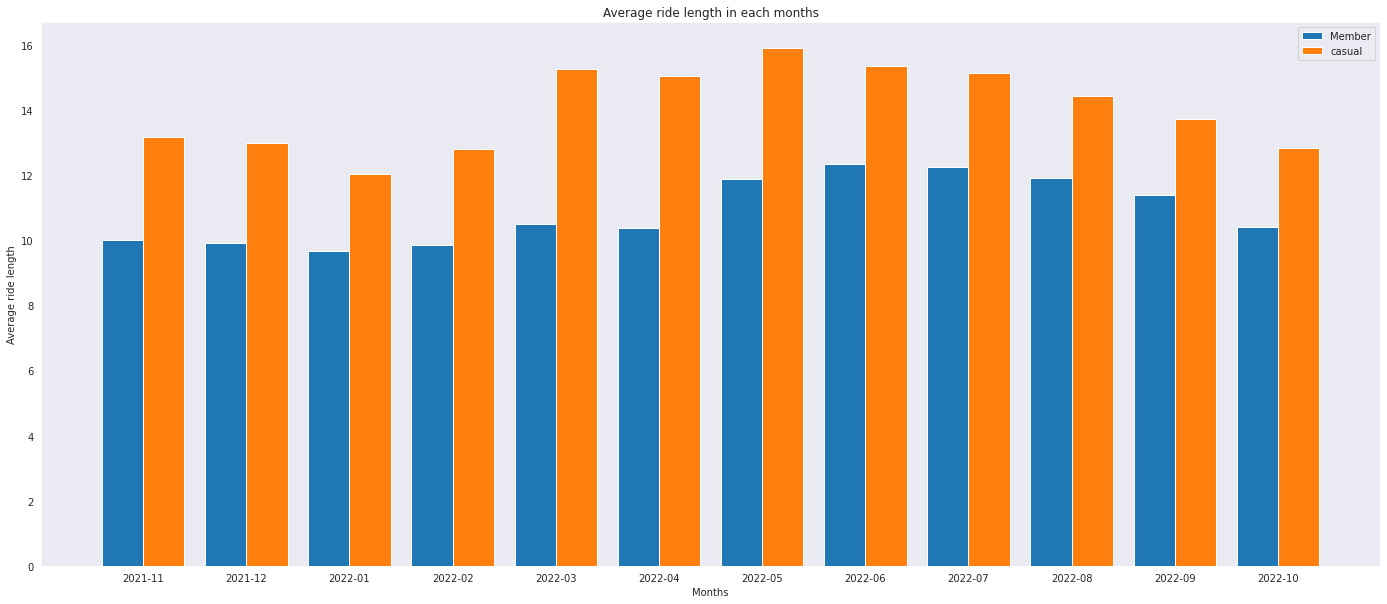

In [45]:
member_ride_length_by_month = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "member",["ride_id","month","ride_length"]].groupby("month").mean()
casual_ride_length_by_month = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "casual",["ride_id","month","ride_length"]].groupby("month").mean()

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data.month.unique()))
bar_width = 0.4

ax.set_ylabel("Average ride length")
ax.set_title("Average ride length in each months")
ax.set_xlabel("Months")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(all_data.month.unique())

b1 = ax.bar(x, member_ride_length_by_month["ride_length"],width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_ride_length_by_month["ride_length"],width=bar_width,label='casual')
ax.legend()

Does not see much but average of casual rides are more than member rides in every month



---


Next let's see average ride_length by day of week 

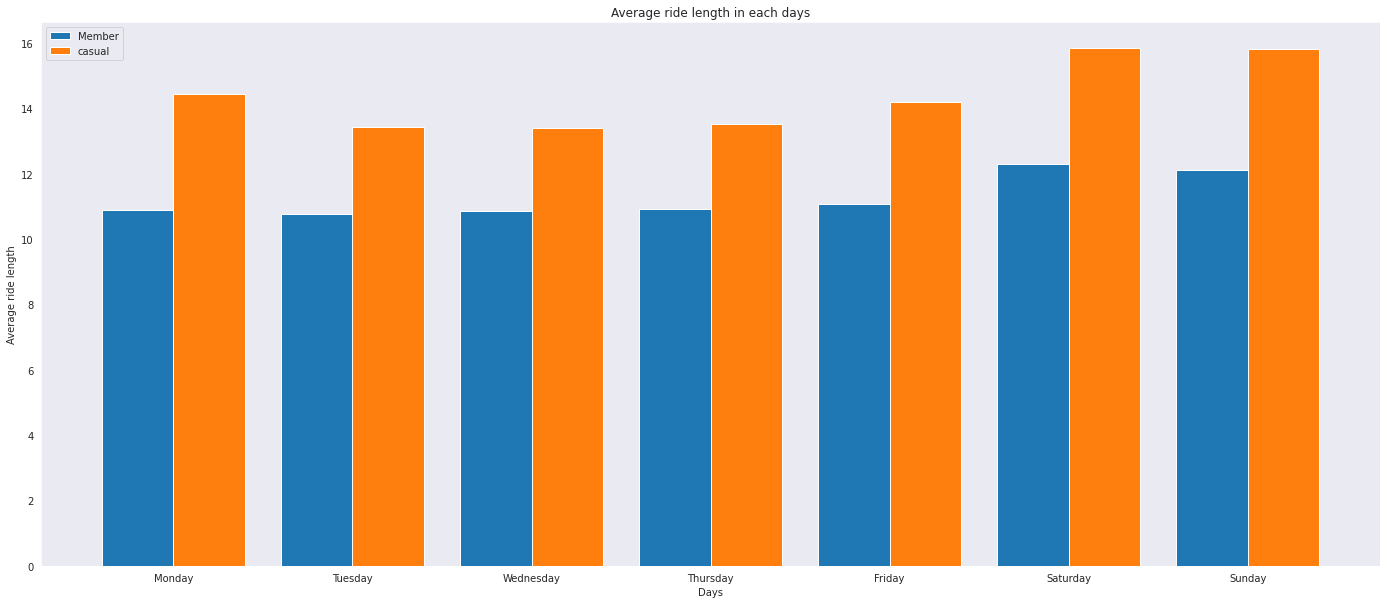

In [46]:
member_ride_length_by_week_day = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "member",["ride_id","day_of_week","ride_length"]].groupby("day_of_week").mean()
casual_ride_length_by_week_day = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "casual",["ride_id","day_of_week","ride_length"]].groupby("day_of_week").mean()

day_index = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, ax = plt.subplots(figsize=(24, 10))
x = np.arange(len(all_data.day_of_week.unique()))
bar_width = 0.4

ax.set_ylabel("Average ride length")
ax.set_title("Average ride length in each days")
ax.set_xlabel("Days")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(day_index)

b1 = ax.bar(x, member_ride_length_by_week_day["ride_length"].reindex(day_index),width=bar_width,label='Member')
b2 = ax.bar(x + bar_width, casual_ride_length_by_week_day["ride_length"].reindex(day_index),width=bar_width,label='casual')
ax.legend()

Well average ride_length of casual ride still more than member average ride_length



---


Next the average ride_length of each bike of member rides

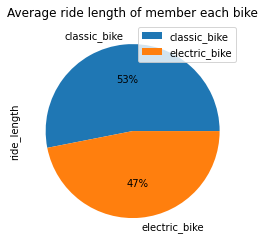

In [28]:
member_ride_length_by_rideable = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "member",["ride_id","rideable_type","ride_length"]].groupby("rideable_type").mean()

member_ride_length_by_rideable.sort_values("rideable_type").plot(kind='pie', y='ride_length',autopct='%1.0f%%',title='Average ride length of member each bike')

The member still use classic bike more than the electric bike



---


Average ride_length of each bike of casual rides

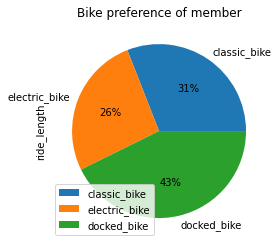

In [30]:
casual_ride_length_by_rideable = all_length_no_outliner.loc[all_length_no_outliner["member_casual"] == "casual",["ride_id","rideable_type","ride_length"]].groupby("rideable_type").mean()

casual_ride_length_by_rideable.reindex(["classic_bike","electric_bike","docked_bike"]).plot(kind='pie', y='ride_length',autopct='%1.0f%%',title='Bike preference of member')
plt.legend(loc="lower left")

Interesting that docked bike that have the least used but have the most average ride_length


---



## Summary



*   The number of casual rides are less than the number of member rides but the average ride length of casual are more then the member average ride length
*   The number of casual rides peak on weekend it mean that the casual rider don't use the bike to go to work
*   Average ride length each months are most likely the same but the number of rides decrese due to the cold weather 






### What we could do?

*   Promote how riding the bike Benefits the Environment and built campaign on riding to work
*   Do the campaign that focus the exercise on weekend
*   In winter season we could make some promotion like discount
*   Gather more data of rider might be benefits on how to promotes our company





